In [41]:
#backtest setting

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import pykrx.stock as stock

In [75]:
kospi =  stock.get_market_ohlcv_by_date ( '20210407' ,  '20210507' ,  'kospi' ,  freq = 'd' )
result = pd.read_excel('/workspace/AlgorithmTrading/운용성과.xlsx', index_col=0)

In [43]:
benchmark = (kospi['종가']/kospi['종가'].iloc[0]).reset_index()

In [58]:
allocs=[]
seed = 100_000_000
stock_count = 20
stock_ratio=int(seed/stock_count)
allocs.append([stock_ratio]*stock_count)

hold_cnt = [33, 197, 411, 17, 64, 108, 164, 1449, 115, 185, 156, 597, 29, 576,
           65, 1686, 594, 920, 357, 256]
hold_price = result * hold_cnt
hold_value = hold_price.sum(axis=1)
rest = 207_917

In [59]:
backtest = pd.DataFrame({'stock_value':hold_value,
                         'total_value':hold_value+rest})
backtest['total_change']=backtest['total_value']/seed

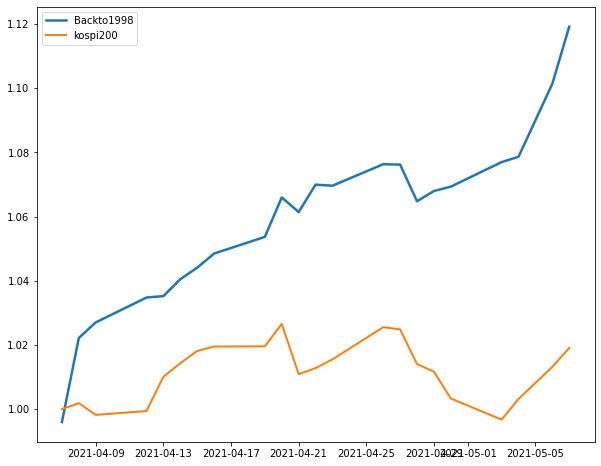

In [88]:
plt.figure(figsize =(10,8))
plt.plot(backtest.index, backtest['total_change'], linewidth='2.5',label='Backto1998')
plt.plot(backtest.index, benchmark['종가'], linewidth='2.',label='kospi200')
plt.legend(loc='upper left')

In [89]:
#보유수량 평가금액 비중 업종 단위 주, 백만원
top10 = pd.DataFrame({'보유수량':hold_cnt, '평가금액':hold_price.iloc[-1], '비중':hold_price.iloc[-1]/hold_value.iloc[-1]*100},index = result.columns)
top10

,보유수량,평가금액,비중
A001130,33,6237000,5.583437
A001680,197,5417500,4.849811
A002460,411,5630700,5.040670
A004370,17,4947000,4.428613
A004690,64,5568000,4.984540
A005830,108,5454000,4.882486
A009770,164,6027000,5.395442
A016100,1449,6151005,5.506453
A017940,115,5548750,4.967307
A034590,185,5143000,4.604075


,A001130,A001680,A002460,A004370,A004690,A005830,A009770,A016100,A017940,A034590,A036190,A036560,A037710,A053210,A072710,A100250,A101530,A117580,A213500,A267290
Code,,,,,,,,,,,,,,,,,,,,
2021-04-07,148000,25350,12250,283500,77900,46000,30338,3540,43700,26602,29850,8340,170000,8670,76000,2969,8487,5423,14200,19725
2021-04-08,153000,25850,12750,285500,79100,46250,31350,3725,44700,26500,30750,9060,173000,8880,77500,2910,9040,5540,14650,20150
2021-04-09,154000,26400,12800,293500,79700,46100,31700,3795,44900,26600,30600,8910,171000,8940,77600,2885,9150,5550,14750,20250
2021-04-12,157000,26600,13050,293500,79800,46200,32600,3810,45600,26800,31000,8770,170500,8960,78100,2850,9300,5530,15300,20300
2021-04-13,156500,26400,12950,295500,80100,44800,32900,3840,46400,26700,31000,8840,172000,9020,78300,2865,9140,5510,15450,20200
2021-04-14,157000,26500,13050,294000,80300,45200,32600,3850,46450,26700,30950,8780,176000,9090,80200,2880,9120,5570,15600,20550
2021-04-15,155000,26350,13100,293500,80800,45500,32900,4000,46700,26600,30950,9210,175500,9060,79800,2905,8990,5550,15300,20800
2021-04-16,156000,26300,13250,293000,81200,45450,34200,4040,46400,26750,30950,9050,175500,9000,78900,2930,9300,5580,15050,21200
2021-04-19,159500,25850,13450,293500,81900,46200,33400,4115,45950,26850,33300,8840,176000,8910,78600,2990,9290,5650,15050,21150
